# AIDS Clinical Trial

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

## 2. Load and Preview Data

In [40]:
url = 'https://drive.google.com/file/d/1ofiJPKb9Ji8aivZlApooyp2Qa_yHgrp9/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


## 3. Data Inspection

In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


## 4. Prepare Working Copy

In [42]:
df_copy = df.copy()

## 5. Multicollinearity Checks
Use correlation and VIF to assess multicollinearity between features.

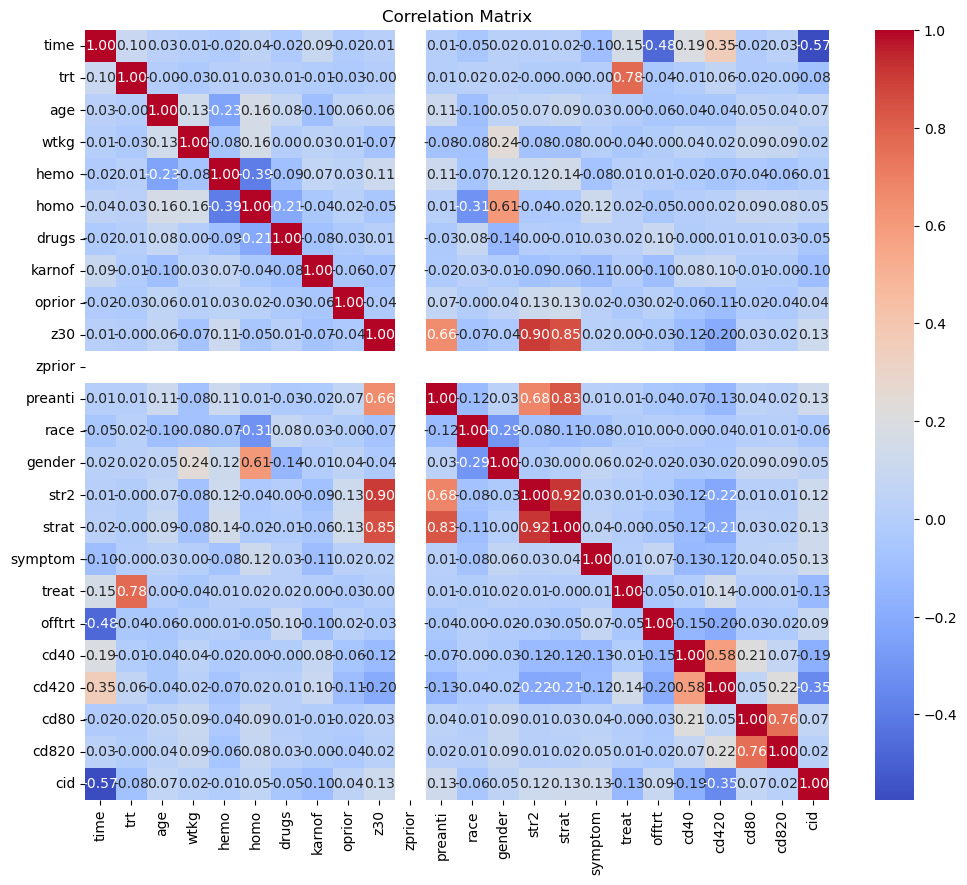

In [43]:
# Example correlation matrix
corr_matrix = df_copy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [86]:
# Create a working copy for VIF and dropna for good measure.
X_vif = df_copy.dropna()
X_vif_scaled = StandardScaler().fit_transform(X_vif)

vif_data = pd.DataFrame({
    'feature': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif_scaled, i) for i in range(X_vif_scaled.shape[1])]
})
vif_data.sort_values(by='VIF', ascending=False)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
15,strat,13.344562
14,str2,11.682527
9,z30,6.449824
11,preanti,3.934750
22,cd820,3.031624
21,cd80,3.024838
5,homo,2.765133
17,treat,2.652750
1,trt,2.551099
20,cd420,2.310287


In [84]:
# Drop the columns with high collinearity but keep 'strat' to check its performance with 'str2' removed
df_vif_reduced = df_copy.drop(columns=['str2', 'z30'], errors='ignore')

# Drop constant columns (std = 0)
constant_cols = df_vif_reduced.columns[df_vif_reduced.std() == 0]
df_vif_reduced = df_vif_reduced.drop(columns=constant_cols)

# Standardize
X_scaled_reduced = StandardScaler().fit_transform(df_vif_reduced)

# Recalculate VIF
vif_reduced = pd.DataFrame({
    'feature': df_vif_reduced.columns,
    'VIF': [variance_inflation_factor(X_scaled_reduced, i) for i in range(X_scaled_reduced.shape[1])]
})

vif_reduced.sort_values(by='VIF', ascending=False)

,feature,VIF
12,strat,3.549281
9,preanti,3.386098
19,cd820,3.013197
18,cd80,2.994782
5,homo,2.755429
14,treat,2.646609
1,trt,2.549120
17,cd420,2.298453
11,gender,2.214489
0,time,2.157077


In [88]:
# Based on VIF analysis, the features `str2` and `z30` had VIF values greater than 5.0, indicating potential multicollinearity.
# Although 'strat' was initially greater than 5.0, it dropped to under 5.0 after removeing 'str2' alone.  
# To improve model stability and interpretability, both features were removed from the dataset prior to further analysis.

hiv_df_clean_copy = df_copy.drop(['str2', 'z30'], axis=1).copy()

hiv_df_clean_copy.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,zprior,...,gender,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,1,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


## 6. Principal Component Analysis (PCA)

In [89]:
# Drop the cid column so it isn't considered a feature. Also drop str2 and z30 due to collinearity.
hiv_df_clean = hiv_df_clean_copy.drop(['cid'], axis=1)
hiv_df_clean.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,zprior,...,race,gender,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,1,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,0,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,0,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,0,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,0,1,3,0,0,0,504,353,870,782


In [ ]:
# Instantiate the PCA model and declare the number of PCA variables
pca = PCA(n_components=2)

In [49]:
# Fit the PCA model on the transformed DataFrame
hiv_pca = pca.fit_transform(hiv_df_clean)

# Review the first 3 rows of list data
hiv_pca[:3]

array([[-735.43022277, -343.06038985],
       [-669.24119099,  562.45137445],
       [1451.92914492,  253.48984089]])

In [50]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.49164856, 0.28570558])

In [51]:
# Create the PCA DataFrame
hiv_pca_df = pd.DataFrame(
    hiv_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
hiv_pca_df.head(10)

,PCA1,PCA2
0,-735.430223,-343.060390
1,-669.241191,562.451374
2,1451.929145,253.489841
3,525.642637,996.590062
4,-127.558977,977.961413
5,32.637242,801.656081
6,-341.560495,578.758380
7,-159.996533,959.135679
8,-763.201817,757.498639
9,-667.266164,630.391119


In [53]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(hiv_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,1.277943e+09
1,2,8.108777e+08
2,3,5.253289e+08
3,4,3.924066e+08
4,5,3.121653e+08


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

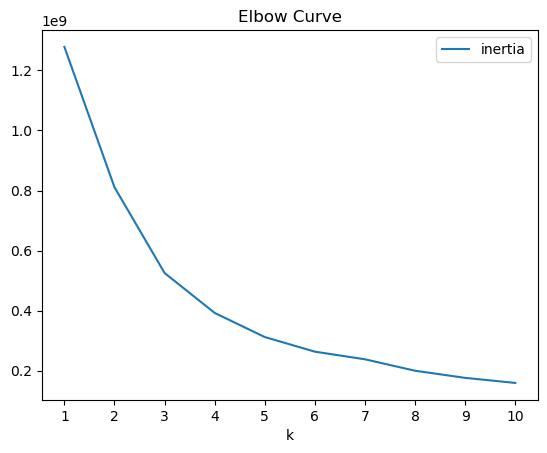

In [54]:
# Plot the Elbow Curve
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [55]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 36.55%
Percentage decrease from k=2 to k=3: 35.21%
Percentage decrease from k=3 to k=4: 25.30%
Percentage decrease from k=4 to k=5: 20.45%
Percentage decrease from k=5 to k=6: 15.58%
Percentage decrease from k=6 to k=7: 9.64%
Percentage decrease from k=7 to k=8: 16.00%
Percentage decrease from k=8 to k=9: 11.87%
Percentage decrease from k=9 to k=10: 9.53%


In [73]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=0)

# Fit the model
model.fit(hiv_pca_df)

# Make predictions
k_3 = model.predict(hiv_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = hiv_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["cid"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

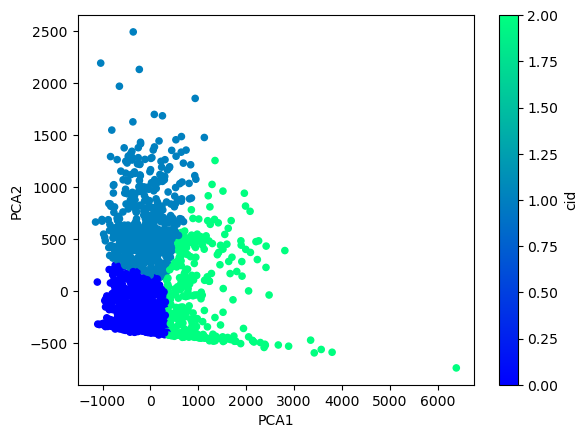

In [74]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="cid",
    colormap='winter')

In [64]:
# Standardize features
X = df_copy.select_dtypes(include=[np.number]).dropna()
X_scaled = StandardScaler().fit_transform(X)

In [65]:
# Fit PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Total variance explained:', np.sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.15942755 0.10480724]
Total variance explained: 0.2642347935787426


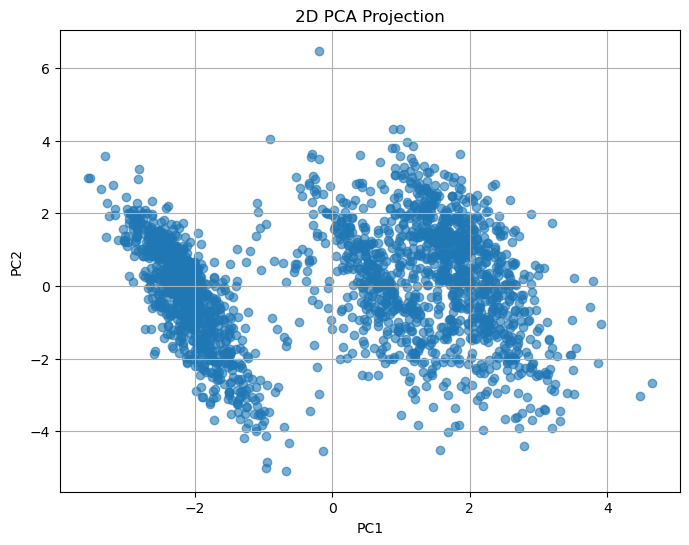

In [66]:
# Fit PCA with 2 components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.grid(True)
plt.show()

In [99]:
# Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Total variance explained:', np.sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.15942755 0.10480724 0.09531033]
Total variance explained: 0.3595451261142794


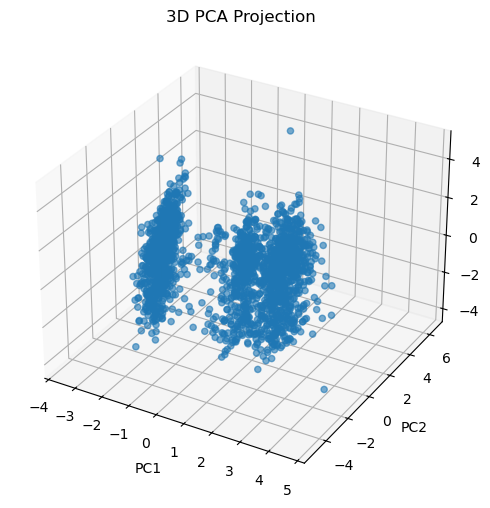

In [95]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection')
plt.show()

## 7. Test and Compare Classification Models

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

# 1. Define features and labels
X = hiv_df_clean_copy.drop(columns=['cid'])
y = df_copy['cid']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale (only for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=5000, penalty='l2', C=0.1, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(max_depth=5, class_weight='balanced'),
    'Extremely Randomized Trees': ExtraTreesClassifier(max_depth=5, class_weight='balanced'),
    'SVM (RBF Kernel)': SVC(kernel='rbf', class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100)
}

f1_scores = {}
fitted_models = {}

for name, model in models.items():
    try:
        # Use scaled data for SVM and KNN
        if name in ['SVM (RBF Kernel)', 'KNN']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred))

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores[name] = f1
        fitted_models[name] = model

    except Exception as e:
        print(f"\n{name} failed: {e}")

# Summary of model scores
print("\nModel F1 Score Summary (weighted):")
for name, score in sorted(f1_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.3f}")


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       327
           1       0.66      0.74      0.70       101

    accuracy                           0.85       428
   macro avg       0.79      0.81      0.80       428
weighted avg       0.86      0.85      0.85       428


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       327
           1       0.64      0.80      0.71       101

    accuracy                           0.85       428
   macro avg       0.79      0.83      0.80       428
weighted avg       0.86      0.85      0.85       428


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       327
           1       0.69      0.81      0.75       101

    accuracy                           0.87       428
   macro

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


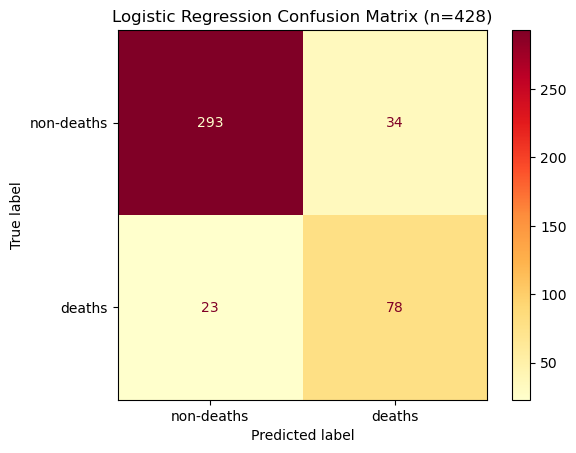

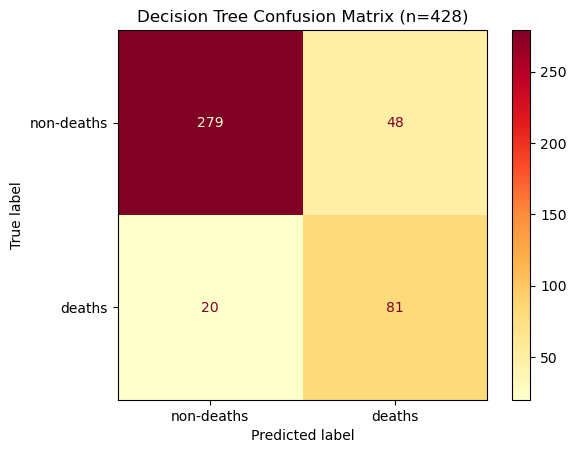

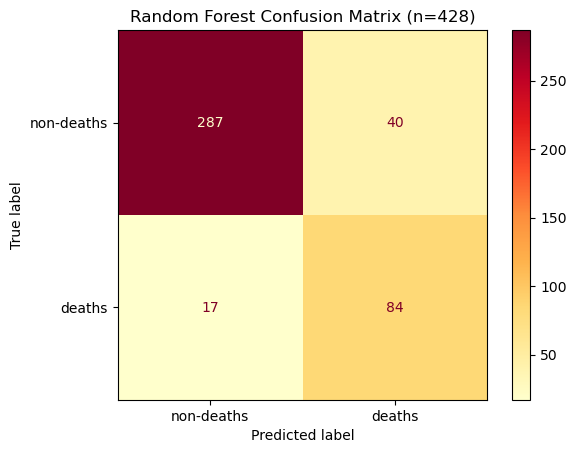

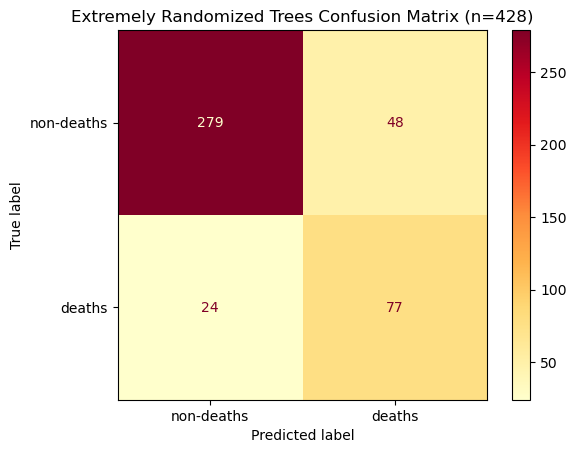

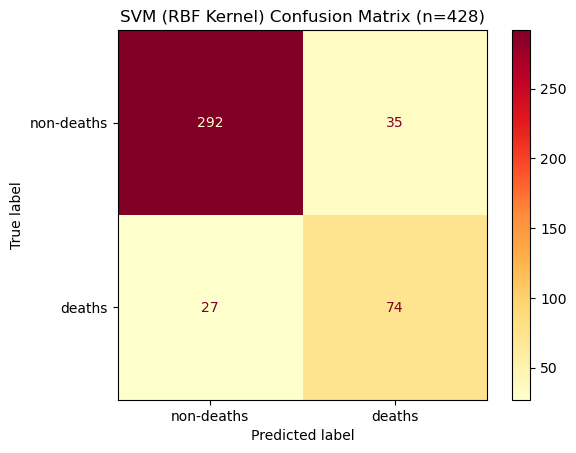

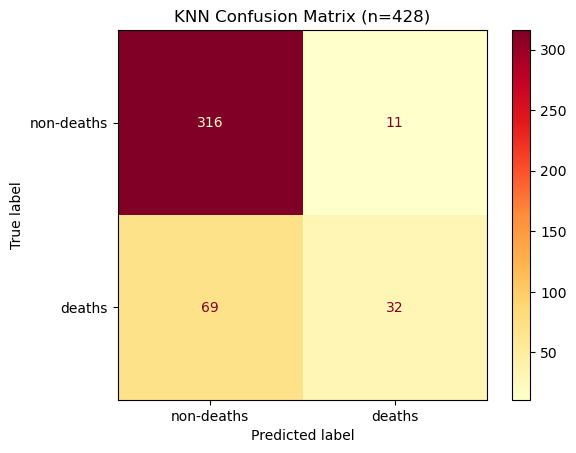

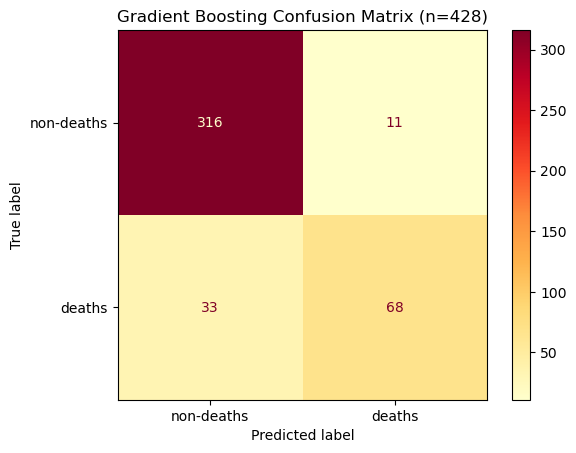

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


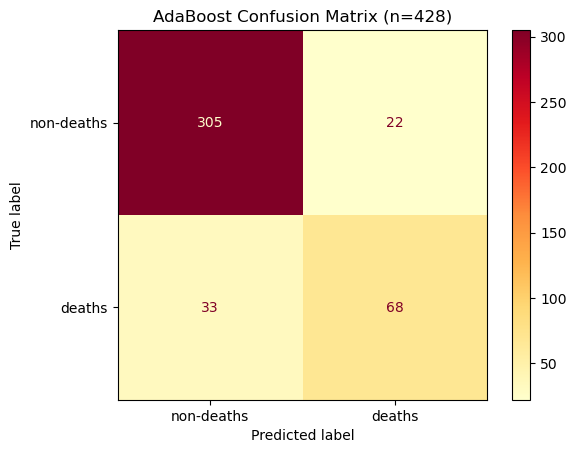

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# New dictionary to store fitted models
fitted_models = {}

for name, model in models.items():
    try:
        model.fit(X_train_scaled , y_train)
        y_pred = model.predict(X_test_scaled)
        cm = confusion_matrix(y_test, y_pred)
        display_labels = np.unique(y_test)

        #print(f"\n{name} confusion Metrix Report:")
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-deaths','deaths'])
        disp.plot(cmap='YlOrRd')
        plt.title(f"{name} Confusion Matrix (n=428)")  # Add model name as title
        plt.show()  # Show the plot
        
        # Save the trained model
        fitted_models[name] = model

    except Exception as e:
        print(f"\n{name} failed: {e}")

## Potential Next Steps

- Calculate PCA with additional components and plot to show any additional structure(s).
- Consider nonlinear techniques like t-SNE or UMAP.
- Conduct regularization, scale continuous variables only.